In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/trai

In [ ]:
train_dir = '/content/cats_and_dogs/train'
print(os.listdir(train_dir))

['cats', 'dogs']


In [ ]:
import shutil
import os

# Paths to the unwanted directories/files
checkpoint_dir = '/content/cats_and_dogs/train/.ipynb_checkpoints'
ds_store_file = '/content/cats_and_dogs/train/.DS_Store'

# Remove the unwanted checkpoint directory (if it exists)
if os.path.exists(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)

# Remove the unwanted .DS_Store file (if it exists)
if os.path.exists(ds_store_file):
    os.remove(ds_store_file)

# Verify the cleanup
print(os.listdir('/content/cats_and_dogs/train'))

['cats', 'dogs']


In [ ]:
test_dir = '/content/cats_and_dogs/test'
print(os.listdir(test_dir))  # Should only list 'unknown'


['unknown', '.ipynb_checkpoints', '.DS_Store']


In [ ]:
# Paths to the unwanted directories/files
checkpoint_dir = '/content/cats_and_dogs/test/.ipynb_checkpoints'
ds_store_file = '/content/cats_and_dogs/test/.DS_Store'

# Remove the unwanted checkpoint directory (if it exists)
if os.path.exists(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)

# Remove the unwanted .DS_Store file (if it exists)
if os.path.exists(ds_store_file):
    os.remove(ds_store_file)

# Verify the cleanup
print(os.listdir('/content/cats_and_dogs/test'))

['unknown']


In [12]:
# 3

# Define the path where you want to create the subdirectory
test_dir = '/content/cats_and_dogs/test/unknown'

# Create the subdirectory
os.makedirs(test_dir, exist_ok=True)


train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=r"/content/cats_and_dogs/train",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=r"/content/cats_and_dogs/validation",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

# Create the test data generator
test_data_gen = test_image_generator.flow_from_directory(
    directory=r"/content/cats_and_dogs/test",  # Path to the test directory
    target_size=(224, 224),  # Resize images
    color_mode="rgb",  # Ensure images are in RGB format
    batch_size=1,  # One image at a time for inference
    class_mode=None,  # No class labels for test data
    shuffle=False,  # Don't shuffle for test data
    seed=42  # For reproducibility
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


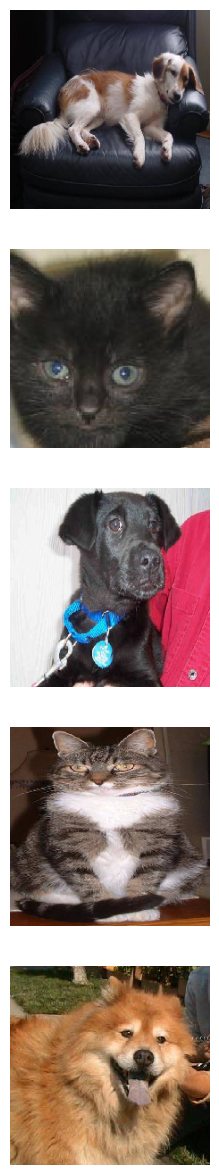

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator with data augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to the range [0, 1]
    rotation_range=30,       # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by 20% of width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of height
    shear_range=0.2,         # Randomly apply shearing transformations
    zoom_range=0.2,          # Randomly zoom into images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill pixels created during transformations
)

train_image_generator =train_image_generator.flow_from_directory(
    directory=r"/content/cats_and_dogs/train",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)



Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


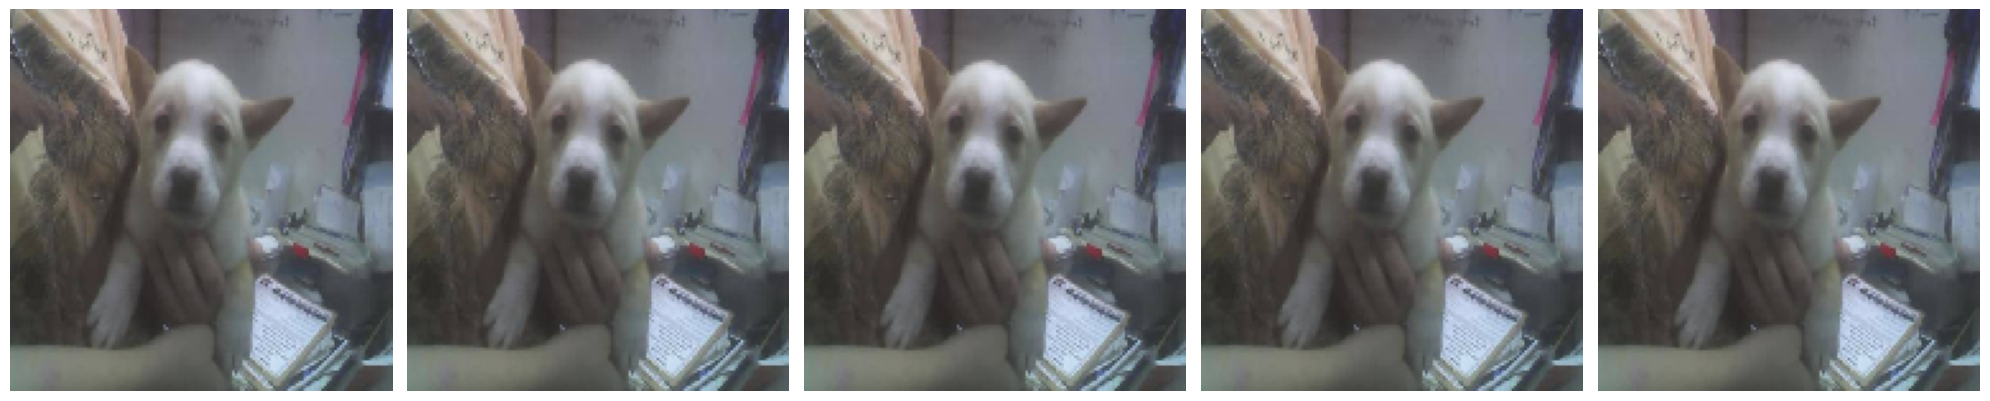

In [9]:
# 6
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
import matplotlib.pyplot as plt
import numpy as np

def plotImages(images_arr):
    """
    Plots a batch of images in a grid.

    Args:
        images_arr (numpy array): Array of images to plot.
    """
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(augmented_images)

In [10]:
# 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout to reduce overfitting
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

# Compile the model
model.compile(
    optimizer='adam',                # Use Adam optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for integer labels
    metrics=['accuracy']             # Track accuracy during training
)

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 8
# Train the model
history = model.fit(
    x=train_data_gen,              # Training data generator
    steps_per_epoch=len(train_data_gen),  # Number of batches per epoch
    epochs=10,                     # Number of training epochs
    validation_data=val_data_gen,  # Validation data generator
    validation_steps=len(val_data_gen)   # Number of validation batches per epoch
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.5318 - loss: 0.7833 - val_accuracy: 0.5300 - val_loss: 0.6855
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step - accuracy: 0.5846 - loss: 0.6769 - val_accuracy: 0.6200 - val_loss: 0.6233
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.6470 - loss: 0.6281 - val_accuracy: 0.6750 - val_loss: 0.6151
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.7360 - loss: 0.5299 - val_accuracy: 0.6990 - val_loss: 0.5794
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.7913 - loss: 0.4630 - val_accuracy: 0.6860 - val_loss: 0.6162
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


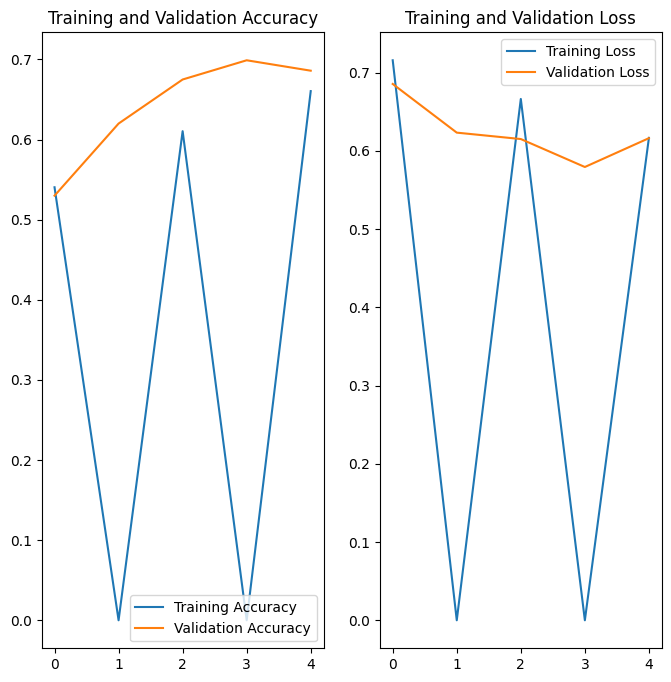

In [17]:
#9
# Trim metrics to the shortest length
min_epochs = min(len(acc), len(val_acc), len(loss), len(val_loss))
epochs_range = range(min_epochs)

acc = acc[:min_epochs]
val_acc = val_acc[:min_epochs]
loss = loss[:min_epochs]
val_loss = val_loss[:min_epochs]

# Plot Training and Validation Metrics
plt.figure(figsize=(8, 8))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()



In [27]:
# ... (other code) ...
import shutil
# Define the path where you want to create the subdirectory
test_dir = '/content/cats_and_dogs/test'  # Point to the main test directory

# Create the subdirectory for unknown images (if not already exists)
unknown_dir = os.path.join(test_dir, 'unknown')
os.makedirs(unknown_dir, exist_ok=True)

# Move test images to the 'unknown' subdirectory
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg'):
        source_path = os.path.join(test_dir, filename)
        destination_path = os.path.join(unknown_dir, filename)
        shutil.move(source_path, destination_path)

# ... (other code) ...

# Create the test data generator
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,  # Use the main test directory
    classes=['unknown'], # Specify the subdirectory containing test images
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

# ... (other code) ...

# Make predictions using the test data generator
probabilities = model.predict(test_data_gen, steps=len(test_data_gen))

# ... (rest of the code) ...

Found 50 images belonging to 1 classes.
 3/50 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [29]:
correct = 0

# Iterate over each image's probabilities and the expected answers
for probability, answer in zip(probabilities, answers):
    # Get the predicted class (0 or 1) based on the higher probability
    predicted_class = 1 if probability[1] > probability[0] else 0

    # Compare predicted class with the correct answer
    if predicted_class == answer:
        correct += 1

# Calculate the percentage of correct predictions
percentage_identified = (correct / len(answers)) * 100

# Check if the model passed the challenge
passed_challenge = percentage_identified >= 63

# Print the result
print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
